## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Telecom Churn.csv')

In [ ]:
df.isnull().sum().values.sum()     #Check if there is any null value

0

In [ ]:
df.head(4)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False


In [ ]:
df.info()          # Observing the Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df.nunique()                   # Observing the Dataframe

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [ ]:
# droping column = Account length because it has no use
df = df.drop('Account length',axis=1)

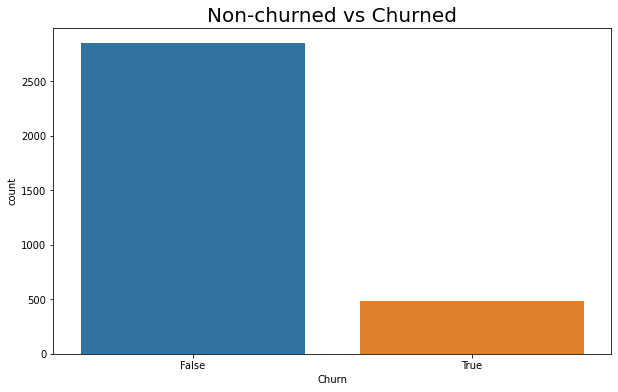

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Churn')
plt.title('Non-churned vs Churned', size=20)
plt.show()

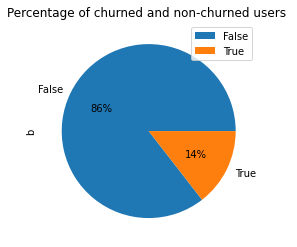

In [ ]:
#labels
lab = df["Churn"].value_counts().keys().tolist()
#values
val = df["Churn"].value_counts().values.tolist()
list_of_tuples = list(zip(lab, val)) 
per_plot=pd.DataFrame(list_of_tuples,columns=['a','b'])
per_plot.groupby(['a']).sum().plot(kind='pie', y='b', autopct='%1.0f%%',title='Percentage of churned and non-churned users ')

##Observation:
From above calculations we can see that our almost 14% customer has been churned. We can definitely do something about that after analyzing the data.


Text(0.5, 0, 'States')

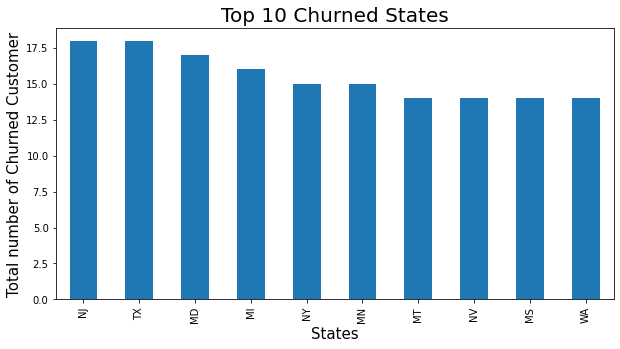

In [ ]:
#Now go for top churned state
most_churned_state=df[df.Churn==True]
most_churned_state=most_churned_state['State'].value_counts()
most_churned_state.sort_index()
se=most_churned_state.head(10)
#plot bar
plt.subplots(figsize=(10,5))
se.plot.bar()

plt.title('Top 10 Churned States', size=20)
plt.ylabel('Total number of Churned Customer',size=15)
plt.xlabel('States',size=15)

##Predictions-
From above barplot we can observe that users of these states are prone to churn. 
According to my hypothesis, following would be the factors that should be implemented for stopping churn in these states:
1. In top three states New Jersey,Texas and Maryland we can definitely choose aggressive pricing strategies and network upgradation as well as improving voice quality of calls in these states.
2. We have to look out for our competeter in these states also as observation says that there may be strong competition.

Text(0.5, 1.0, 'Churn in terms of Voice mail plan ')

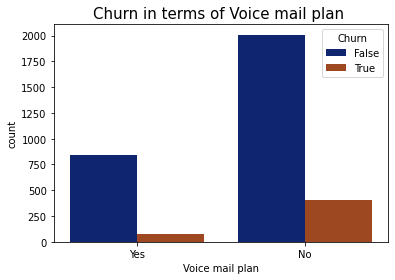

In [ ]:
#count plot
ba=sns.countplot(x="Voice mail plan",hue ="Churn",data=df,palette = "dark")
ba.set_title('Churn in terms of Voice mail plan ', fontsize=15)

##Predictions:
From above plot we can see that the number of churned users who opt for voice mail plan is lesser than campare to those who did not opted for that.
so we can predict that our voice mail plan is doing good hence we can improve it furthur.

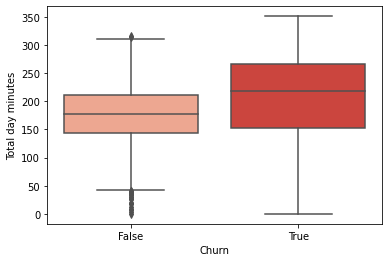

In [ ]:
# Relation between Churn and Total day minutes
sns.boxplot(x="Churn",y="Total day minutes",data=df,palette = "Reds")

##Predictions-
From above box-plot we can observ that users who are spending 225 minutes or more (approx 4hrs) tend to switch to other operator.
According to my hypothesis, following would be the factors that should be implemented:



  1. Network Disturbance during a Call.
  2. Need to Upgrade or make smarter use of technologies like VoLTE for improvement of  Voice Quality durinf calls.
  3. Network Upgradation. *italicized text*

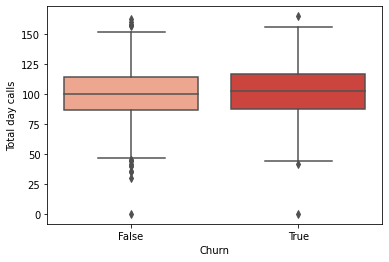

In [ ]:
# Relation between Churn and Total day calls
sns.boxplot(x="Churn",y="Total day calls",data=df,palette = "Reds")


##Predictions-
From above plot we can observe that for the churned customer the median is slightly higher than 100 which indicates there maybe  call drops which may lead to more calls in morning.

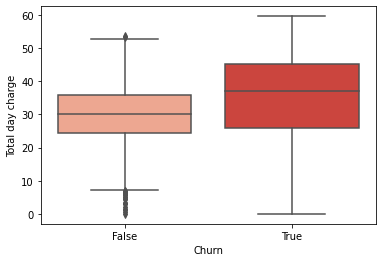

In [ ]:
# Relation between Churn and Total day charge
sns.boxplot(x="Churn",y="Total day charge",data=df,palette = "Reds")

##Predictions-
From observing above boxplot we can clearly indicate a good strategy to be implemented. We can say that Customers having more day minutes spent on the network tend to leave it's subscription and from the above box-plot it clearly indicates that there is defect in the pricing startegy of the company.
According to my Hypothsis:
1. Startegy of pricing needs to be re-evaluated.
2. we can give discounts for the customers who have high spending of day minutes.

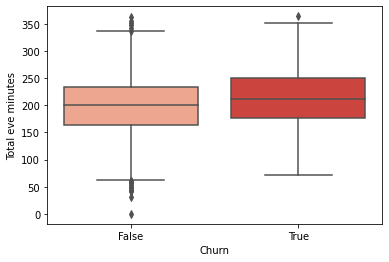

In [ ]:
# Relation between Churn and Total eve minutes
sns.boxplot(x="Churn",y="Total eve minutes",data=df,palette = "Reds")

##Predictions-
From above box-plot we can observ that users who are spending 210 minutes or more tend to switch to other operator.
According to my hypothesis,Again following would be the factors that should be implemented :
  1. Network Disturbance during a Call.
  2. Need to Upgrade or make smarter use of technologies like VoLTE for improvement of  Voice Quality during calls.
  3. Network Upgradation.

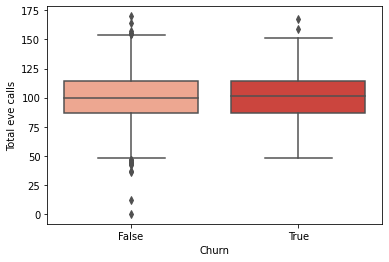

In [ ]:
# Relation between Churn and Total eve calls
sns.boxplot( x='Churn',y='Total eve calls',data=df,palette = "Reds")

##Predictions-
From above box plot we can say that on an average a 100 eve calls are made which is a good indication for the company.

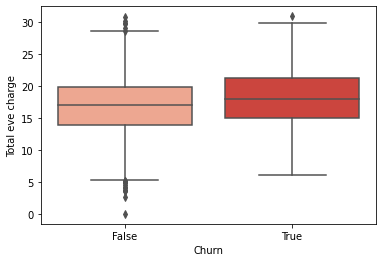

In [ ]:
#  Relation between Churn and Total eve charges
sns.boxplot(x="Churn",y="Total eve charge",data=df,palette = "Reds")


From observing above boxplot we can say that pricing needs to be re-evaluated and we can give discounts for the customers who have high spending of eve minutes.

In [ ]:
print('Maximum number of night  calls:',df['Total night calls'].max())
print('Minimum number of night  calls:',df['Total night calls'].min())
print('Average number of night  calls:',df['Total night calls'].mean())

Maximum number of night  calls: 175
Minimum number of night  calls: 33
Average number of night  calls: 100.10771077107711


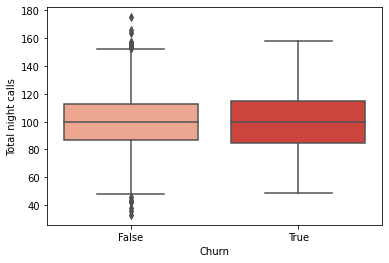

In [ ]:
#  Relation between Churn and Total night calls
sns.boxplot(x="Churn",y="Total night calls",data=df,palette = "Reds")


##predictions-
From observing boxplots of night minutes,night calls and night charges We can say that Customers having more night minutes spent on the network tend to leave it's subscription and from the above box-plot it clearly indicates that there is defect in the pricing startegy of the company and we can give discounts for the customers who have high night call minutes spending.

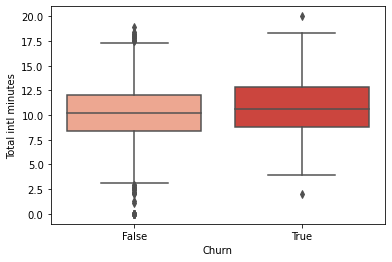

In [ ]:
# Relation between Churn and Total international minutes
sns.boxplot(x="Churn",y="Total intl minutes",data=df,palette = "Reds")

##Predictions-
Observations from the above boxplot indicates that
Users who make the International Call tend to spend more minutes

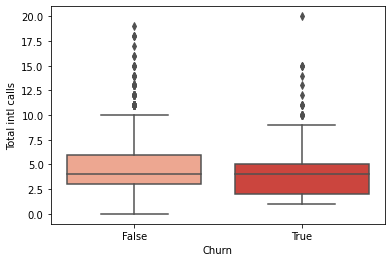

In [ ]:
# Relation between Churn and Total international calls
sns.boxplot(x="Churn",y="Total intl calls",data=df,palette = "Reds")

##Predictions-
Observations from the above boxplot indicates that
churned users make lesser call than non-churned users.

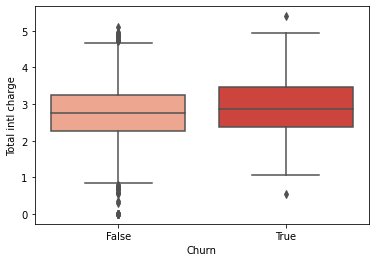

In [ ]:
# Relation between Churn and Total international charges
sns.boxplot(x="Churn",y="Total intl charge",data=df,palette = "Reds")


##Predictions-
From above box plot we can say that Different Pricing Strategy and International Calling Rate Optimization would lead to lower churn rate.

Text(30.506423611111103, 0.5, 'Count')

<Figure size 1080x576 with 0 Axes>

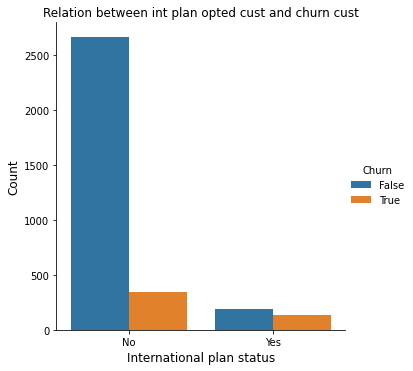

In [ ]:

plt.figure(figsize = (15,8))
sns.catplot(data = df, x ='International plan', hue = 'Churn',
           kind = 'count')
plt.title('Relation between int plan opted cust and churn cust', fontsize = 12)
plt.xlabel('International plan status', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
# OR
# ba=sns.countplot(x="International plan",hue ="Churn",data=df,palette = "dark")
# ba.set_title('Churn in terms of International plan ', fontsize=15)

##Inference:
The ratio between churned user who opted for international plan and who don't is almost 50-50. It means there is some problem with the pricing or voice call quality for Intrnational plan opted users.
According to my hypothesis after monitoring the voice quality of international calls, following would be the factors that should be implemented :
  1. Need to Upgrade or make smarter use of technologies like VoLTE for improvement of  Voice Quality during calls.
  2. Network Upgradation for international calls. 


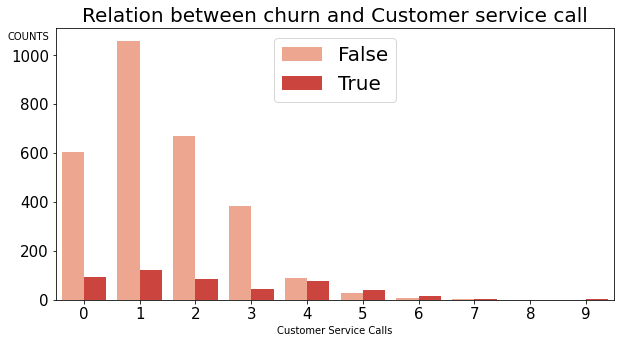

In [ ]:
# Customer Calls
fig, axz = plt.subplots(figsize=(10,5))

axz = sns.countplot(x='Customer service calls', hue='Churn', data=df, palette='Reds')

axz.set_title('Relation between churn and Customer service call', fontsize=20)
axz.set_ylabel('COUNTS', rotation=0, labelpad=50,size=10)
axz.set_xlabel('Customer Service Calls', size=10)
axz.yaxis.set_label_coords(-0.05, 0.95)  # (x, y)
axz.legend(loc=0,fontsize=20);

axz.tick_params(labelsize=15)  # Changes size of the values on the label

##Predictions
After observing the above plot we can say that some customers are lazy and hence without resolving the issue they have jumped to other network operator,while the customers who have called once also have high churn rate indicating their issue was not solved in first attempt.
According to my hypothesis,following would be the factors that should be implemented :
1. We have to promote our customer services.
2. Strengthening the customer service department can be helpful also. 
3. we can take Feedback from customer who called customer services.

In [ ]:
#Replacing True/False values with 1 and 0
df['Churn'] = df['Churn'].replace({bool(True):1,bool(False):0})
#Replacing Yes/No values with 1 and 0
df['International plan'] = df['International plan'].replace({"Yes":1,"No":0}).astype(int)
df['Voice mail plan'] = df['Voice mail plan'].replace({"Yes":1,"No":0}).astype(int)

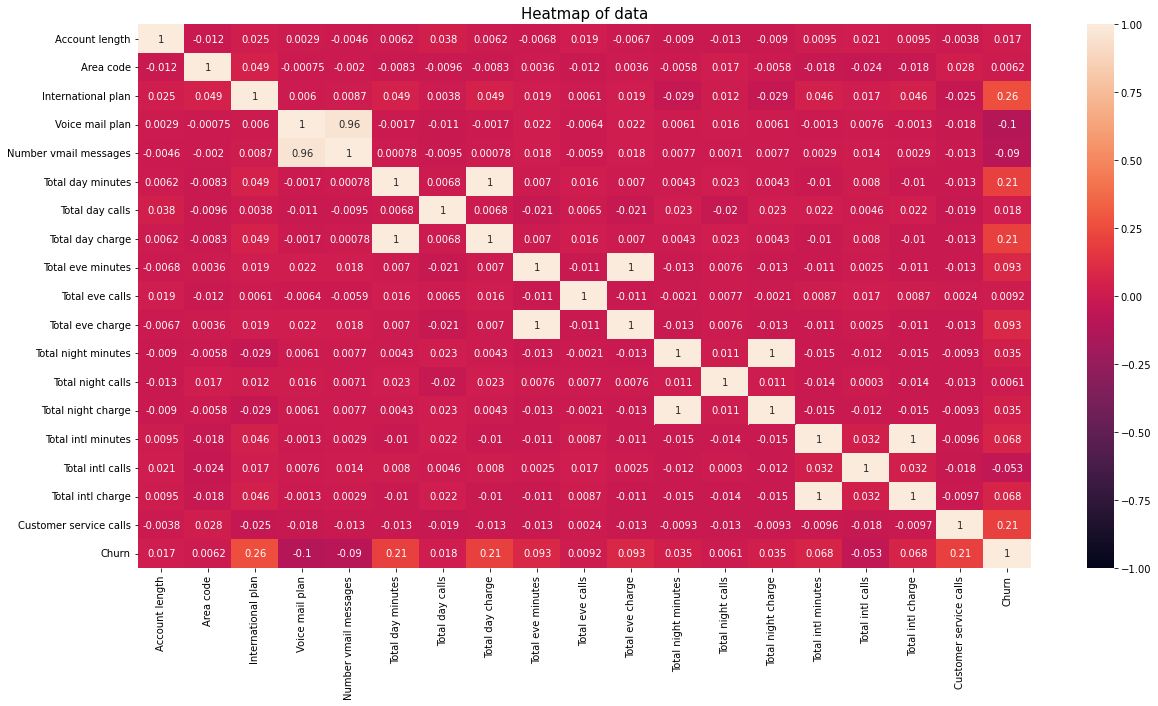

In [ ]:
#Correlation
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(df.corr(), vmin=-1,annot = True)
plt.title("Heatmap of data",fontsize= 15)
plt.show()

#Conclusions-
##Here is our suggestion to prevent churn :
1. Upgrading network to improve services for long duration users.
2. Improving Pricing Strategies.
3. Optimizing and Updating  Internationall Call Rates.
4. Implmenting a better network infrastructure in New Jersey,Texas and Maryland Areas where there is more Churn Rate.
6. Improvement in the customer service can be done to reduce the number of calls which cause the churn
7. Decreasing the prices as the talk-time increases can be an effective way to reduce the churn.

Further for Improvement we can suggest and discuss more strategies to the company by collecting other data and through a domain expert
